## 02 - Identificando os grupos etários com K-means: Kaggle Titanic

## Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [2]:
mpl.rcParams['figure.figsize'] = (12, 7)
sns.set(style='darkgrid')

## Carregando os dados

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/SalatielBairros/kaggle-titanic/main/data/processed/train_processed.csv')
del titanic['Unnamed: 0']
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds
0,0,3,male,22,1,0,SC,S,1
1,1,1,female,38,1,0,C,C,1
2,1,3,female,26,0,0,SC,S,0
3,1,1,female,35,1,0,C,S,1
4,0,3,male,35,0,0,SC,S,0


In [4]:
idades, frequencia = np.unique(titanic.Age.values, return_counts=True)

## Visualizando as idades e frequencias

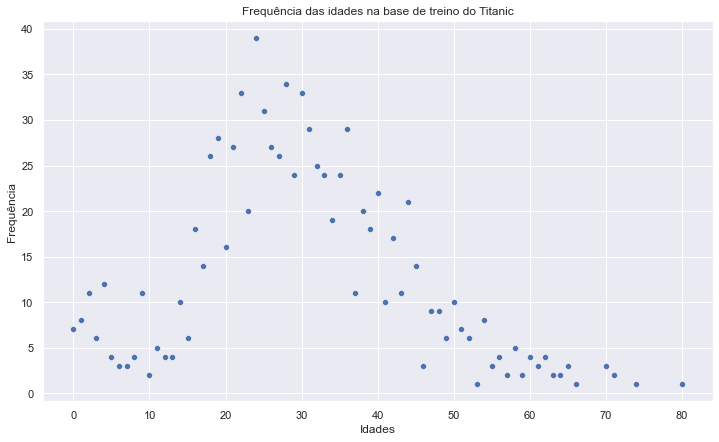

In [5]:
sns.scatterplot(x=idades, y=frequencia)
plt.xlabel('Idades')
plt.ylabel('Frequência')
plt.title('Frequência das idades na base de treino do Titanic')
plt.show();

## Criando os grupos

In [6]:
X = pd.DataFrame()
X['Idade'] = idades
X['Frequencia'] = frequencia
X

,Idade,Frequencia
0,0,7
1,1,8
2,2,11
3,3,6
4,4,12
...,...,...
66,66,1
67,70,3
68,71,2
69,74,1


In [7]:
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]
n_init = [10, 15, 20]
max_iter = [300, 500]
resultados = []


for n in n_clusters:
    for i in n_init:
        for m in max_iter:
            agrupador = KMeans(n_clusters=n, n_init=i, max_iter=m)
            labels = agrupador.fit_predict(X)
            ss = silhouette_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            db = davies_bouldin_score(X, labels)
            values, counts = np.unique(labels, return_counts=True)
            r = {
                  'n_clusters': n,
                  'n_init': i,
                  'max_iter': m,
                  'Silhouette': ss,
                  'Calinski': ch,
                  'Bouldin':  db,
                  'counts': counts
            }
            resultados.append(r)

grupos = pd.DataFrame(data=resultados)

## Avaliando os modelos gerados

In [8]:
grupos.sort_values(by='Silhouette', ascending=False).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
8,3,15,300,0.585296,183.431825,0.533583,"[18, 28, 25]"
7,3,10,500,0.585296,183.431825,0.533583,"[25, 18, 28]"
11,3,20,500,0.585296,183.431825,0.533583,"[25, 28, 18]"
10,3,20,300,0.585296,183.431825,0.533583,"[18, 28, 25]"
9,3,15,500,0.585296,183.431825,0.533583,"[25, 28, 18]"


O coeficiente de silhueta é bom para dados com curvas no espaço.

In [9]:
grupos.sort_values(by='Calinski', ascending=False).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
47,9,20,500,0.415719,228.071374,0.702227,"[6, 9, 7, 4, 10, 10, 4, 12, 9]"
43,9,10,500,0.405746,227.381409,0.691393,"[7, 10, 11, 9, 4, 10, 4, 6, 10]"
44,9,15,300,0.418646,226.600335,0.710899,"[10, 9, 10, 4, 6, 12, 10, 6, 4]"
46,9,20,300,0.421908,225.363464,0.708621,"[4, 6, 10, 7, 12, 9, 5, 9, 9]"
45,9,15,500,0.410104,224.199553,0.730523,"[8, 10, 10, 6, 11, 10, 8, 4, 4]"


O Calinski não performa tão bem para dados com curva no espaço e com baixa densidade. Portanto não é a melhor métrica a ser usada para este dataset.

In [10]:
grupos.sort_values(by='Bouldin', ascending=True).head(5)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
10,3,20,300,0.585296,183.431825,0.533583,"[18, 28, 25]"
6,3,10,300,0.585296,183.431825,0.533583,"[25, 28, 18]"
7,3,10,500,0.585296,183.431825,0.533583,"[25, 18, 28]"
8,3,15,300,0.585296,183.431825,0.533583,"[18, 28, 25]"
9,3,15,500,0.585296,183.431825,0.533583,"[25, 28, 18]"


O Bouldin é baseado na semelhança dos elementos dentro do cluster e diferença entre os clusters, sendo melhor mas semelhante ao coeficiente de silhueta.

In [11]:
grupos.sort_values(by=['Silhouette', 'Bouldin', 'Calinski', 'n_init', 'max_iter'], ascending=[False, True, True, True, True]).head(1)

,n_clusters,n_init,max_iter,Silhouette,Calinski,Bouldin,counts
6,3,10,300,0.585296,183.431825,0.533583,"[25, 28, 18]"


## Executando o modelo selecionado

O melhor modelo agrupou as idades em 3 pela frequência, permitindo, a princípio, uma categorização mais justa com relação à distribuição dos dados.

In [12]:
agrupador = KMeans(n_clusters=3, n_init=10, max_iter=300)
labels = agrupador.fit_predict(X)
X['faixa_etaria'] = labels
X.sample(10)

,Idade,Frequencia,faixa_etaria
22,22,33,1
0,0,7,2
68,71,2,0
50,50,10,0
53,53,1,0
47,47,9,0
1,1,8,2
33,33,24,1
2,2,11,2
24,24,39,1


In [13]:
X.groupby('faixa_etaria').Idade.describe()

,count,mean,std,min,25%,50%,75%,max
faixa_etaria,,,,,,,,
0,28.0,57.142857,9.755205,41.0,49.75,56.5,63.25,80.0
1,25.0,30.120000,7.568135,18.0,24.00,30.0,36.00,44.0
2,18.0,8.500000,5.338539,0.0,4.25,8.5,12.75,17.0


In [14]:
map_idade = {
    0: 'crianca_adolescente',
    1: 'adulto_idoso',
    2: 'jovem_adulto'
}
titanic = (titanic.merge(X, left_on='Age', right_on='Idade')).drop(columns=['Idade', 'Frequencia'])
titanic['faixa_etaria'] = titanic.faixa_etaria.map(map_idade)
titanic.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Floor,Embarked,Relateds,faixa_etaria
311,0,1,male,28,0,0,SC,S,0,adulto_idoso
780,0,3,female,9,3,2,SC,S,5,jovem_adulto
8,0,3,male,22,0,0,SC,S,0,adulto_idoso
681,0,3,male,30,0,0,SC,C,0,adulto_idoso
533,0,3,male,29,0,0,SC,S,0,adulto_idoso
501,1,1,female,33,0,0,B,S,0,adulto_idoso
346,0,1,male,19,3,2,C,S,5,adulto_idoso
187,0,3,male,20,0,0,SC,S,0,adulto_idoso
554,1,1,male,49,1,0,C,C,1,crianca_adolescente
89,0,1,male,35,0,0,SC,C,0,adulto_idoso


In [15]:
titanic.to_csv('../../data/processed/train_processed.csv')